In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss_mse(y, tx, w):
    """ COMPUTE_LOSS_MSE
        Calculates the loss of a dataset using MSE.

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        A scalar of the mean square error of the model applied on the dataset
    """
    return sum((y - tx @ w)**2)/len(y)

def compute_loss_mae(y, tx, w):
    """ COMPUTE_LOSS_MAE
        Calculates the loss of a dataset using MAE.

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        A scalar of the mean square error of the model applied on the dataset
    """
    return sum(np.abs(y-tx @ w))/len(y)

def compute_loss(y, tx, w, method="mse"):
    """ COMPUTE_LOSS Computes loss of a dataset
        Calculates the loss of a dataset using MSE or MAE.
        Defaults to using MSE if nothing is specified, or if an invalid method is chosen.

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        A scalar of the mean square error of the model applied on the dataset
    """
    if (method=="mae"): # return loss of mae function
        return sum(np.abs(y-tx @ w))/len(y)
    elif (method=="mse"): # return loss of mse function
        return sum((y - tx @ w)**2)/len(y)
    else:
        print("Incorrect method chosen for compute_loss function. Defaulting to MSE") # change to warnings.warn when library added
        return sum((y - tx @ w)**2)/len(y)

In [5]:
compute_loss(y,tx,w,method='msda')

NameError: name 'w' is not defined

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """ GRID_SEARCH
        Performs a naive grid search of parameters w0 and w1 as a model
        for the output variable y

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w0: An m-dimensional array of the first elements (offset) of the model
        w1: An n-dimensional array of the second elements of the model

        OUTPUTS:
        An m by n array of the costs for each of the combinations of w0 and w1
    """
    losses = np.zeros((len(w0), len(w1)))

    for i in range(0,len(w0)):
        for j in range(0,len(w1)):
            losses[i,j] = compute_loss_mse(y, tx, np.array([w0[i],w1[j]]).T)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356506, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.662 seconds


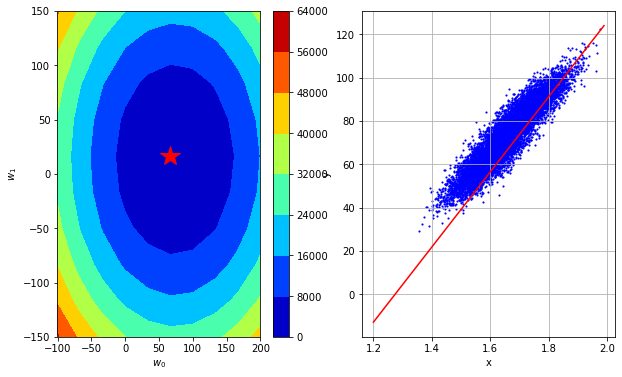

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient_mse(y, tx, w):
    """ COMPUTE_GRADIENT
        Computes the gradient of the MSE of a model applied on a set

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        A dx1 array of the gradient 
    """
    return -1/len(y) * tx.T @ (y - tx @ w)

def compute_gradient_mae(y, tx, w):
    """ COMPUTE_GRADIENT
        Computes the gradient of the MAE of a model applied on a set

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        A dx1 array of the gradient 
    """
    return -1/len(y) * np.sign(y - tx @ w) @ tx

def compute_gradient(y, tx, w, method='mse'):
    """ COMPUTE_GRADIENT
        Computes the gradient of a model applied on a set using MSE or MAE.
        Defaults to using MSE if nothing is specified, or if an invalid method is chosen

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        A dx1 array of the gradient 
    """
    
    if (method=='mae'): # return gradient of mae function
        return -1/len(y) * np.sign(y - tx @ w) @ tx
    elif (method=='mse'): # return loss of mse function
        return -1/len(y) * tx.T @ (y - tx @ w)
    else:
        print("Incorrect method chosen for compute_loss function. Defaulting to MSE") # change to warnings.warn when library added
        return -1/len(y) * tx.T @ (y - tx @ w)

In [93]:
compute_gradient_mae(y, tx, w)

array([-0.10891089, -0.79136429])

In [9]:
w_test1 = np.array([100,20]).T
w_test2 = np.array([50,10]).T
grad1 = compute_gradient_mse(y,tx,w_test1)
grad2 = compute_gradient_mse(y,tx,w_test2)
print('Gradient 1: %s, Gradient 2: %s' % (grad1, grad2))

Gradient 1: [26.706078    6.52028757], Gradient 2: [-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent_mse(y, tx, initial_w, max_iters, gamma):
    """ GRADIENT_DESCENT
        Iterates and finds the best model using gradient descent and MSE

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        initial_w: a dx1 array of the initial model to use
        max_iters: a scalar representing the maximum number of iterations
        gamma: a scalar representing the step size/learning rate

        OUTPUTS:
        losses: a max_iters dimensional array representing losses for iterations
        ws: a max_iters dimensional array representing models over iterations
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute the gradient and loss given the current w
        grad = compute_gradient_mse(y, tx, w)
        loss = compute_loss_mse(y, tx, w)
        # update w by gradient descent
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

def gradient_descent_mae(y, tx, initial_w, max_iters, gamma):
    """ GRADIENT_DESCENT
        Iterates and finds the best model using gradient descent and MAE

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        initial_w: a dx1 array of the initial model to use
        max_iters: a scalar representing the maximum number of iterations
        gamma: a scalar representing the step size/learning rate

        OUTPUTS:
        losses: a max_iters dimensional array representing losses for iterations
        ws: a max_iters dimensional array representing models over iterations
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute the gradient and loss given the current w
        grad = compute_gradient_mae(y, tx, w)
        loss = compute_loss_mae(y, tx, w)
        # update w by gradient descent
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

def gradient_descent(y, tx, initial_w, max_iters, gamma, method='mse'):
    """ GRADIENT_DESCENT Finds best model using gradient descent
        Iterates and finds the best model using gradient descent.
        Uses MSE or MAE, defaulting to MSE if nothing specified or wrong method given.

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        initial_w: a dx1 array of the initial model to use
        max_iters: a scalar representing the maximum number of iterations
        gamma: a scalar representing the step size/learning rate

        OUTPUTS:
        losses: a max_iters dimensional array representing losses for iterations
        ws: a max_iters dimensional array representing models over iterations
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    if not method:
        method = 'mse'
    
    for n_iter in range(max_iters):
        # compute the gradient and loss given the current w
        grad = compute_gradient(y, tx, w, method)
        loss = compute_loss(y, tx, w, method)
        # update w by gradient descent
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent {method}({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              method=method, bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
            
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [13]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma,'mae')
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent mae(0/49): loss=73.29392200210475, w0=0.6999999999999457, w1=-1.6708856520608605e-15
Gradient Descent mae(1/49): loss=72.59392200210573, w0=1.3999999999998913, w1=-3.341771304121721e-15
Gradient Descent mae(2/49): loss=71.89392200210521, w0=2.099999999999837, w1=-5.012656956182582e-15
Gradient Descent mae(3/49): loss=71.19392200210541, w0=2.7999999999997827, w1=-6.683542608243442e-15
Gradient Descent mae(4/49): loss=70.49392200210544, w0=3.499999999999728, w1=-8.354428260304303e-15
Gradient Descent mae(5/49): loss=69.79392200210495, w0=4.199999999999674, w1=-1.0025313912365163e-14
Gradient Descent mae(6/49): loss=69.09392200210587, w0=4.89999999999962, w1=-1.1696199564426024e-14
Gradient Descent mae(7/49): loss=68.39392200210568, w0=5.599999999999566, w1=-1.3367085216486884e-14
Gradient Descent mae(8/49): loss=67.69392200210594, w0=6.299999999999512, w1=-1.5037970868547744e-14
Gradient Descent mae(9/49): loss=66.9939220021058, w0=6.999999999999458, w1=-1.67088565206086

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [71]:
def compute_stoch_gradient(y, tx, w):
    """ COMPUTE_STOCH_GRADIENT
        Compute a stochastic gradient from just few examples n and
        their corresponding y_n labels.
    """
    return -1/len(y) * tx.T @ (y - tx @ w)


def stochastic_gradient_descent_mse(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    data_size = len(y)
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # generate a batch dataset
        shuffle_indices = np.random.permutation(np.arange(data_size))
        batch_y = y[shuffle_indices < batch_size]
        batch_tx = tx[shuffle_indices < batch_size]
        # compute the gradient and loss given the current w
        grad = compute_gradient_mse(batch_y, batch_tx, w)
        loss = compute_loss_mse(batch_y, batch_tx, w)
        # update w by gradient descent
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

def stochastic_gradient_descent_mae(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    data_size = len(y)
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # generate a batch dataset
        shuffle_indices = np.random.permutation(np.arange(data_size))
        batch_y = y[shuffle_indices < batch_size]
        batch_tx = tx[shuffle_indices < batch_size]
        # compute the gradient and loss given the current w
        grad = compute_gradient_mae(batch_y, batch_tx, w)
        loss = compute_loss_mae(batch_y, batch_tx, w)
        # update w by gradient descent
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [18]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 5

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent_MSE(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic gradient Descent(0/49): loss=3848.1273951545745, w0=42.17638199529454, w1=-21.831320019004252
Stochastic gradient Descent(1/49): loss=4445.5467876828425, w0=70.65863772818062, w1=35.25367623564381
Stochastic gradient Descent(2/49): loss=445.6643382205046, w0=65.70132718313354, w1=19.47146690309242
Stochastic gradient Descent(3/49): loss=135.4692037530904, w0=71.14348022193141, w1=15.064583275687871
Stochastic gradient Descent(4/49): loss=35.874488722385934, w0=71.30754596426583, w1=13.942414240240502
Stochastic gradient Descent(5/49): loss=39.87980159245835, w0=73.85417780464138, w1=15.747353086171167
Stochastic gradient Descent(6/49): loss=24.15827941605895, w0=73.59001326601029, w1=13.20560120561304
Stochastic gradient Descent(7/49): loss=23.30423380453672, w0=71.87780741885655, w1=14.972999186289961
Stochastic gradient Descent(8/49): loss=45.29612894446459, w0=73.7188302060555, w1=11.750116262643678
Stochastic gradient Descent(9/49): loss=31.134965917063123, w0=75.4489743

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [23]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)



In [24]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent_mse(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5739.6702290717085, w0=51.847464098448434, w1=7.724426406192428
Gradient Descent(1/49): loss=636.5642494031922, w0=67.40170332798299, w1=10.041754328050118
Gradient Descent(2/49): loss=177.28471123302543, w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/49): loss=135.94955279771037, w0=73.46785662750146, w1=10.945512217574596
Gradient Descent(4/49): loss=132.22938853853205, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=131.89457375520604, w0=74.01381042445813, w1=11.026850427631796
Gradient Descent(6/49): loss=131.8644404247067, w0=74.0516072257859, w1=11.03248153448191
Gradient Descent(7/49): loss=131.8617284249617, w0=74.06294626618423, w1=11.034170866536943
Gradient Descent(8/49): loss=131.8614843449847, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=131.86146237778678, w0=74.06736849193958, w1=11.034829706038407
Gradient Descent(10/49): loss=131.86146040073896, w0=74.06767464603033, w1=11

In [1]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

NameError: name 'gradient_ws' is not defined

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [73]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 250
gamma = 0.7
batch_size = 5

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent_mae(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic gradient Descent(0/249): loss=68.88275348050516, w0=0.7, w1=-0.0981644495541004
Stochastic gradient Descent(1/249): loss=64.19002750745253, w0=1.4, w1=-0.3868140822359485
Stochastic gradient Descent(2/249): loss=83.16734574287881, w0=2.0999999999999996, w1=0.2585560250577439
Stochastic gradient Descent(3/249): loss=63.630200627733885, w0=2.8, w1=0.014909600134114825
Stochastic gradient Descent(4/249): loss=78.25272788283492, w0=3.5, w1=0.41658761385036336
Stochastic gradient Descent(5/249): loss=75.3202947511958, w0=4.2, w1=0.7599194214681521
Stochastic gradient Descent(6/249): loss=75.83935897412874, w0=4.9, w1=1.0302338560762356
Stochastic gradient Descent(7/249): loss=74.86382505466246, w0=5.6000000000000005, w1=1.3712271908409626
Stochastic gradient Descent(8/249): loss=74.3286542051892, w0=6.300000000000001, w1=1.7056365593697305
Stochastic gradient Descent(9/249): loss=66.31331104673734, w0=7.000000000000001, w1=1.7097155731911073
Stochastic gradient Descent(10/249): l

In [74]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=251, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>